<a href="https://colab.research.google.com/github/nagendraputhane/learn_computer_vision/blob/master/OpenCV_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab notebook
import cv2

Populating the interactive namespace from numpy and matplotlib


In [0]:
%matplotlib inline

Reading and displaying image with numpy/matplotlib

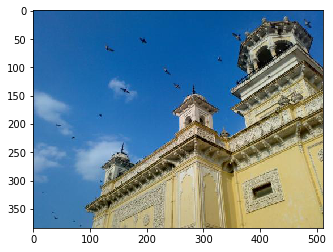

In [0]:
im2disp = imread('home.jpg')
figure()
imshow(im2disp)

now the openCV way

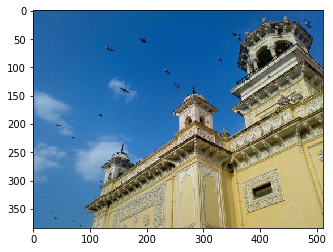

In [0]:
cvim2disp = cv2.imread('home.jpg')

imshow(cv2.cvtColor(cvim2disp, cv2.COLOR_BGR2RGB))

Blurring

1. Gaussian 

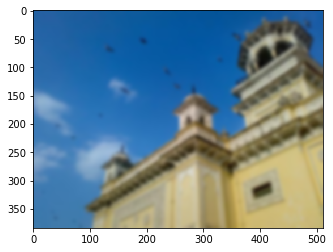

In [0]:
im2disp = imread('home.jpg')
blurred = cv2.GaussianBlur(im2disp,(19, 19), 0)
figure()
imshow(blurred)

2. Custom kernel

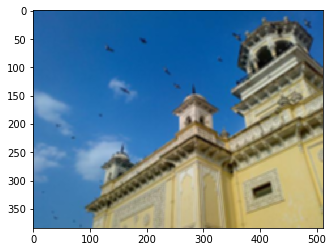

In [0]:
kernel = np.ones((5,5), np.float32)/25
blurred = cv2.filter2D(im2disp, -1, kernel)
figure()
imshow(blurred)

Saving an image

In [0]:
cv2.imwrite('mynewfile.jpg', cvim2disp)

True

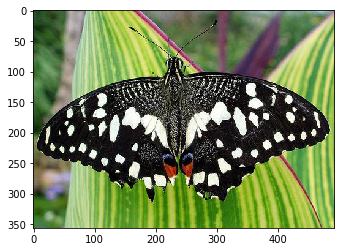

In [0]:
bfly = imread('butterfly.jpg')
figure()
imshow(bfly)

In [0]:
bfly = cv2.cvtColor(bfly, cv2.COLOR_BGR2RGB)

Grayscale

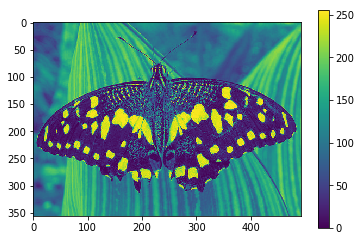

In [0]:
bflygray = cv2.cvtColor(bfly, cv2.COLOR_BGR2GRAY)
figure()
imshow(bflygray)
colorbar()

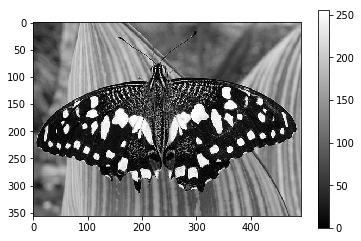

In [0]:
#you may or may not want the default rainbow map
figure()
imshow(bflygray, cmap = 'gray')
colorbar()

In [0]:
print(bfly.shape)
print(bflygray.shape)

(356, 493, 3)
(356, 493)


In [0]:
bfly.dtype

dtype('uint8')

y dimension comes first. hence height is before width

Extract RGB channels

In [0]:
redc = bfly[:, :, 0]
greenc = bfly[:, :, 1]
bluec = bfly[:, :, 2]

In [0]:
bluec.shape

(356, 493)

Recombine

In [0]:
height, width = bfly.shape[0:2]

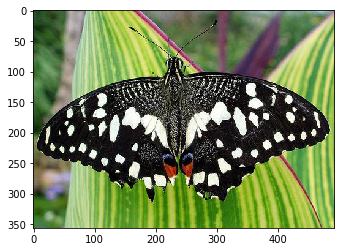

In [0]:
combined = zeros((height, width, 3), uint8)
combined[:, :, 0] = redc
combined[:, :, 1] = greenc
combined[:, :, 2] = bluec

figure()
imshow(combined)

Extract a region

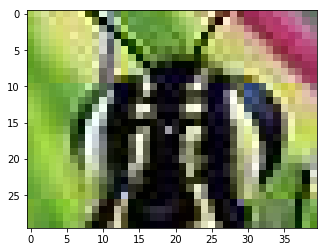

In [0]:
bflyhead = bfly[70:100, 210:250]
figure()
imshow(bflyhead)

Writing to pixels

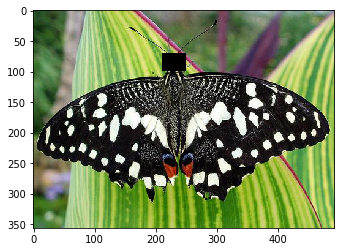

In [0]:
bfly[70:100, 210:250] = 0
figure()
imshow(bfly)

Exercises:

1) Take an image and write a big + sign over it.

In [0]:
bflycopy = bfly.copy()

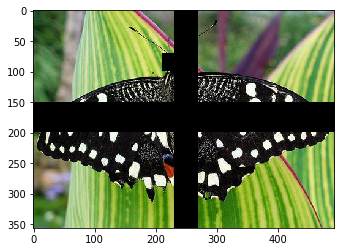

In [0]:
bflycopy[0:360, 230:270] = 0
bflycopy[150:200, 0:500] = 0
figure()
imshow(bflycopy)

2) Create a function that will take in two images and return an image that combines them into a larger side-by-side image.

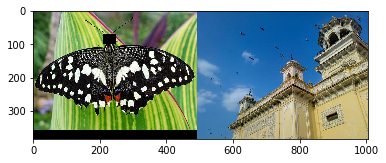

In [0]:
def sidebyside(imageleft, imageright):
  newimheight = max(imageleft.shape[0], imageright.shape[0])
  newimwidth = imageleft.shape[1] + imageright.shape[1]
  newim = zeros((newimheight, newimwidth, 3), uint8)
  newim[0:imageleft.shape[0], 0:imageleft.shape[1]] = imageleft[:, :, :]
  newim[0:imageright.shape[0], imageleft.shape[1]:newimwidth] = imageright[:, :, :]
  return newim

imshow(sidebyside(bfly, im2disp))

Image Weighted Blending

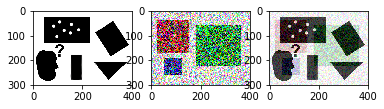

In [0]:
img1 = imread('pic1.png')
img2 = imread('pic2.png')

dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

figure()
subplot(1, 3, 1)
imshow(img1)
subplot(1, 3, 2)
imshow(img2)
subplot(1, 3, 3)
imshow(dst)

Median-blur to cartoonify a real image.

Text(0.5, 1.0, 'cartoonified')

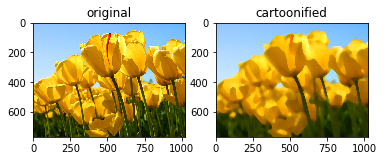

In [6]:
tulips = imread('Tulips.jpg')
tublur = cv2.medianBlur(tulips, 29)

figure()
subplot(1, 2, 1)
imshow(tulips)
title('original')
subplot(1, 2, 2)
imshow(tublur)
title('median-blur')

High-pass filtering

Text(0.5, 1.0, 'Sobel Y')

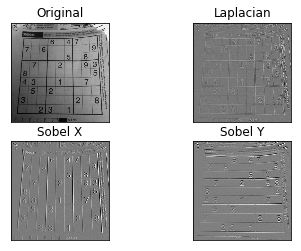

In [11]:
img = cv2.imread('sudokubig.jpg', 0)

#laplacian
laplacian = cv2.Laplacian(img, cv2.CV_64F)
#sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)

figure()
subplot(2, 2, 1)
imshow(img, cmap = 'gray')
xticks([]), plt.yticks([])
title('Original')
subplot(2, 2, 2)
imshow(laplacian, cmap = 'gray')
xticks([]), plt.yticks([])
title('Laplacian')
subplot(2, 2, 3)
imshow(sobelx, cmap = 'gray')
xticks([]), plt.yticks([])
title('Sobel X')
subplot(2, 2, 4)
imshow(sobely, cmap = 'gray')
xticks([]), plt.yticks([])
title('Sobel Y')


Canny Edge detection

Text(0.5, 1.0, 'Edge image')

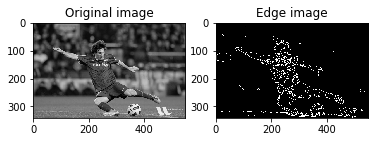

In [12]:
img = cv2.imread('messi5.jpg', 0)# the 0 parameter converts the image to grayscale
edge = cv2.Canny(img, 100, 200)

figure()
subplot(121)
imshow(img, cmap = 'gray')
title('Original image')
subplot(122)
imshow(edge, cmap = 'gray')
title('Edge image')

Morphological Operations

//its binary

//for the region of interests in the image.

Erosion

Dilation

Floodfilled

In [13]:
mgrid[-1:1:0.01, -1:1:0.01]

array([[[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
        [-0.99, -0.99, -0.99, ..., -0.99, -0.99, -0.99],
        [-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98],
        ...,
        [ 0.97,  0.97,  0.97, ...,  0.97,  0.97,  0.97],
        [ 0.98,  0.98,  0.98, ...,  0.98,  0.98,  0.98],
        [ 0.99,  0.99,  0.99, ...,  0.99,  0.99,  0.99]],

       [[-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        ...,
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99]]])

Text(0.5, 1.0, 'flood-filled')

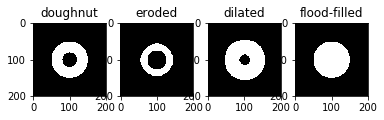

In [18]:
yy = mgrid[-1:1:0.01, -1:1:0.01][0]
xx = yy.T #transpose
circ = 0*xx
circ [xx**2+yy**2 < 0.5**2] = 1 #square(x) + square(y) < square(radius)
circ [xx**2+yy**2 < 0.2**2] = 0

#box kernel
kernel = ones((10, 10), float32)

#morphological operations
erosion = cv2.erode(circ, kernel, iterations = 1)

dilation = cv2.dilate(circ, kernel, iterations = 1)

floodfilled = cv2.floodFill(image = circ.astype(uint8).copy(), mask = None, seedPoint = (100, 100), newVal = 1)

figure()
subplot(1, 4, 1)
imshow(circ, cmap = 'gray')
title('doughnut')
subplot(1, 4, 2)
imshow(erosion, cmap = 'gray')
title('eroded')
subplot(1, 4, 3)
imshow(dilation, cmap = 'gray')
title('dilated')
subplot(1, 4, 4)
imshow(floodfilled[1].astype(float32), cmap = 'gray')
title('flood-filled')

Thresholding

hard thresholding vs adaptive thresholding 

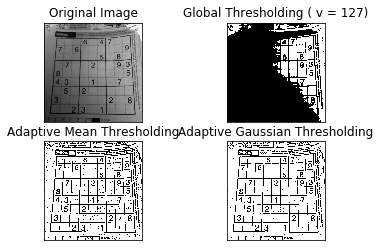

In [21]:
img = cv2.imread('sudokubig.jpg', 0)
img = cv2.medianBlur(img, 5)

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding ( v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

figure()
for i in range(4):
  subplot(2, 2, i+1)
  plt.imshow(images[i], 'gray')
  title(titles[i])
  xticks([]), yticks([])